# Mall customers segmentation

To do this analysis I took a cue from this article:
https://towardsdatascience.com/mall-customers-segmentation-using-machine-learning-274ddf5575d5

## Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

### Read Dataset

In [2]:
dataset = pd.read_csv("../Datasets/mall_customers.zip").drop(columns=['CustomerID'])

### Dataset exploration and visualization

In [3]:
le = LabelEncoder()
encoded_genre = le.fit_transform(dataset['Genre'])
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(dataset.drop(columns=['Genre'])), columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df['Genre'] = encoded_genre

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     200 non-null    float64
 1   Annual Income (k$)      200 non-null    float64
 2   Spending Score (1-100)  200 non-null    float64
 3   Genre                   200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Genre
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16,0.440000
std,1.002509e+00,1.002509e+00,1.002509e+00,0.497633
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,0.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,0.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,1.000000


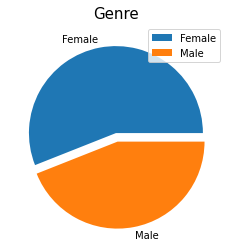

In [6]:
labels = ['Female', 'Male']
size = df['Genre'].value_counts()
explode = [0, 0.1]

plt.pie(size, explode = explode, labels = labels)
plt.title('Genre', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

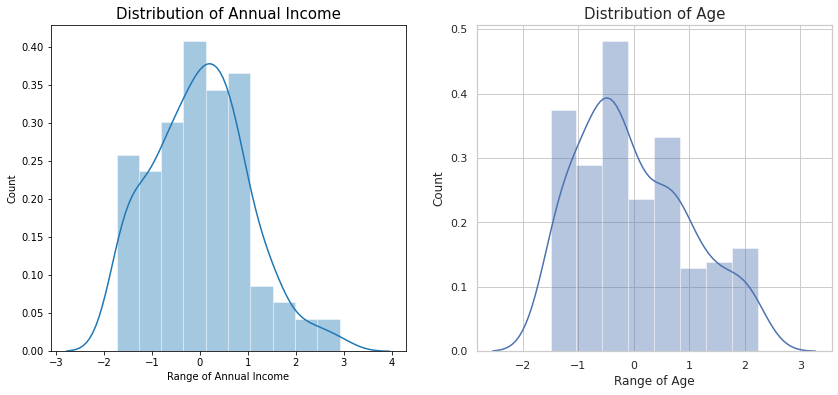

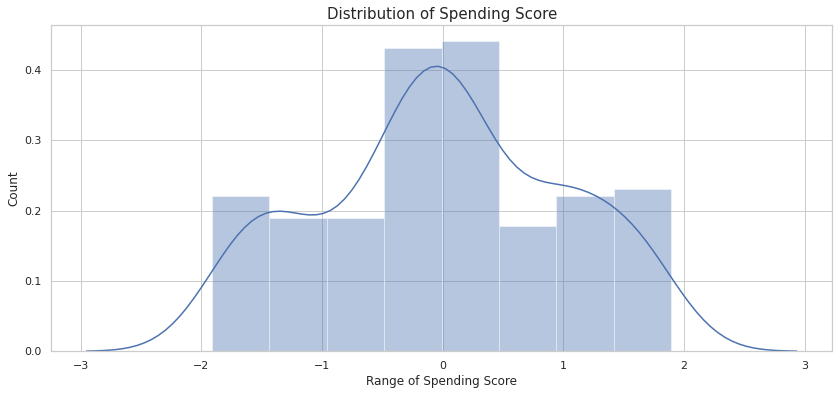

In [7]:
plt.rcParams['figure.figsize'] = (14, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score', fontsize = 15)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

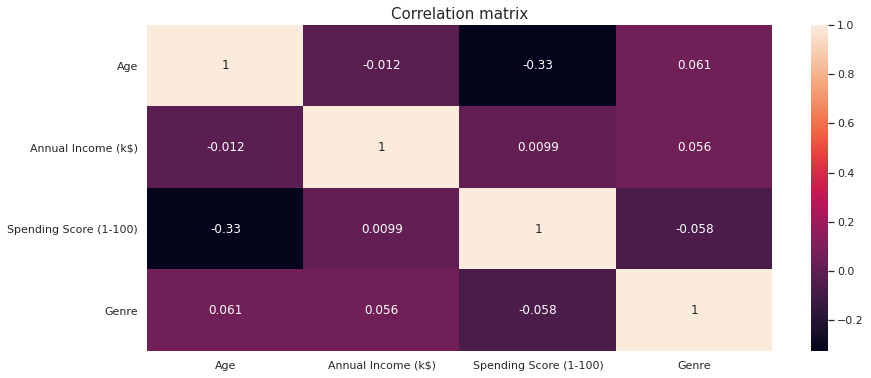

In [8]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation matrix', size='15')

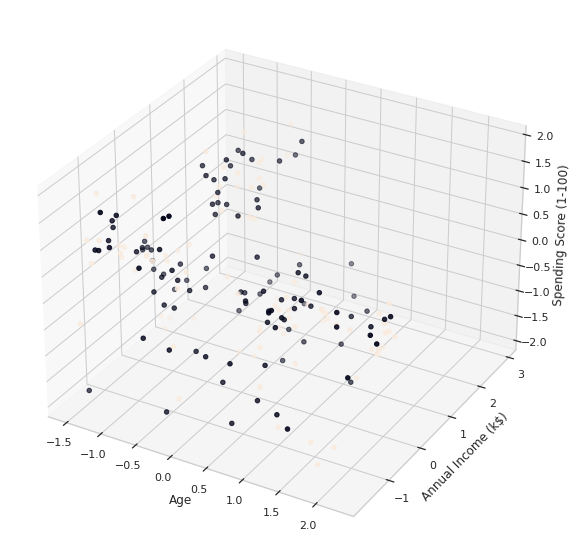

In [9]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Genre'], marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

## Clustering

### Kmeans

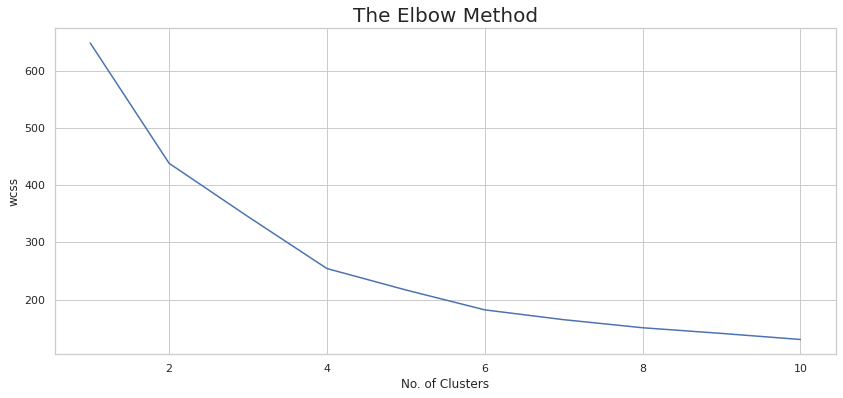

In [10]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

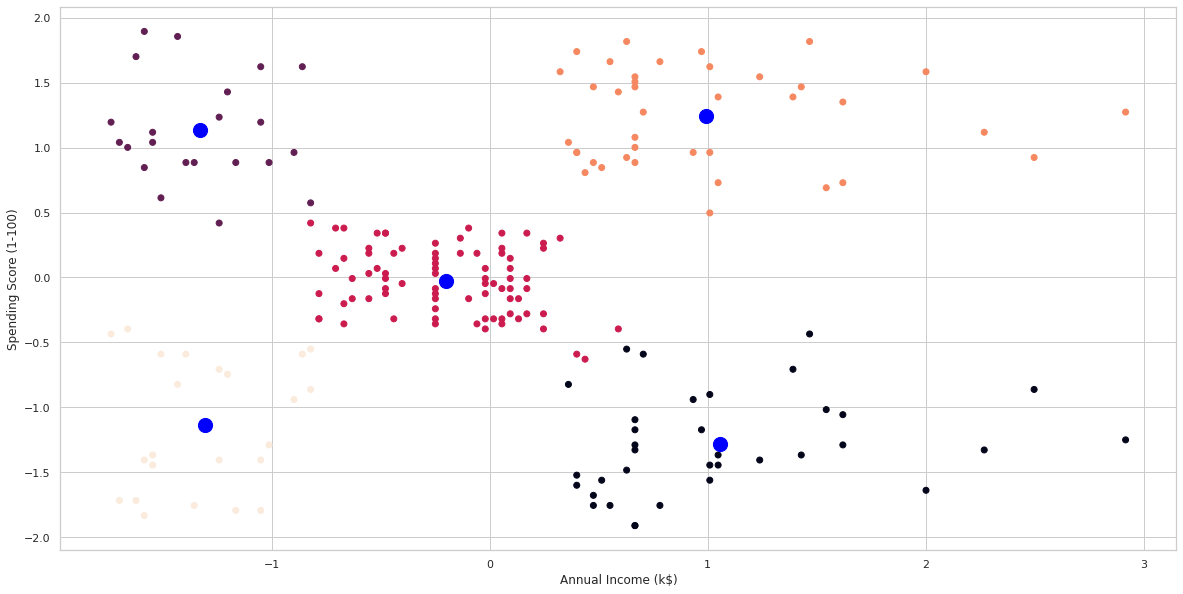

In [13]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_means, marker='o')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'blue' , label = 'centeroid')

plt.show()

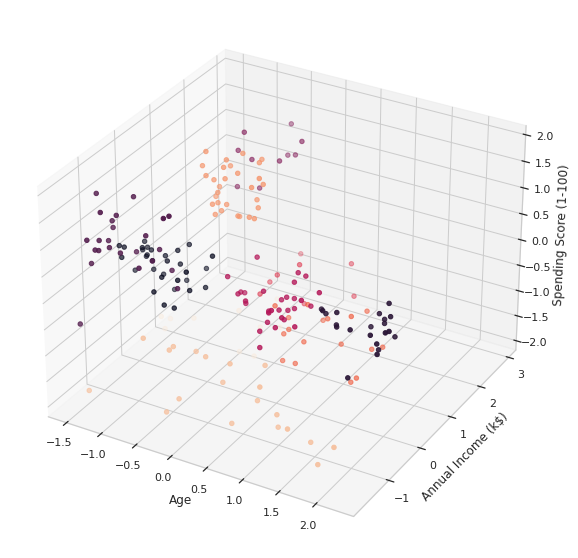

In [12]:
segmentation_results = KMeans(random_state=0, n_clusters = 10).fit_predict(df)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=segmentation_results, marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()